# Measures branching in C++ from python

This notebooks looks into a couple of ways to write code, which one is efficient, which one is not when it comes to write fast and short loops. Both experiments are around [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## First experiment: comparison C++ syntax

This all started with article [Why is it faster to process a sorted array than an unsorted array?](https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array/11227902#11227902). It compares different implementation fo the following function for which we try different implementations for the third line in next cell. The last option is taken
[Checking whether a number is positive or negative using bitwise operators](https://stackoverflow.com/questions/3779202/checking-whether-a-number-is-positive-or-negative-using-bitwise-operators) which avoids [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [3]:
# int nb = 0;
# for(auto it = values.begin(); it != values.end(); ++it)
#     if (*it >= th) nb++; // this line changes
#     if (*it >= th) nb++; // and is repeated 10 times inside the loop.
#     // ... 10 times
# return nb;

The third line is also repeated 10 times to avoid the loop being too significant. The code is available on github: [cbenchmark.cpp](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/cbenchmark.cpp) and
[repeat_fct.h](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/repeat_fct.h).

In [4]:
from cpyquickhelper.numbers.cbenchmark import measure_scenario_A, measure_scenario_B
from cpyquickhelper.numbers.cbenchmark import measure_scenario_C, measure_scenario_D
from cpyquickhelper.numbers.cbenchmark import measure_scenario_E, measure_scenario_F
from cpyquickhelper.numbers.cbenchmark import measure_scenario_G, measure_scenario_H
from cpyquickhelper.numbers.cbenchmark import measure_scenario_I, measure_scenario_J

In [5]:
import pandas

def test_benchmark(label, values, th, repeat=10, number=20):
    funcs = [(k, v) for k, v in globals().copy().items() if k.startswith("measure_scenario")]
    rows = []
    for k, v in funcs:
        exe = v(values, th, repeat, number)
        d = exe.todict()
        d['doc'] = v.__doc__.split('``')[1]
        d['label'] = label
        d['name'] = k
        rows.append(d)        
    df = pandas.DataFrame(rows)
    return df

test_benchmark("sorted", list(range(10)), 5)

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,6.715500e-07,6.853369e-07,if (values[i] >= th) ++nb;,sorted,1.580000e-06,0.000001,measure_scenario_A,20.0,10.0
1,6.321000e-07,6.419160e-07,if (*it >= th) ++nb;,sorted,1.581000e-06,0.000001,measure_scenario_B,20.0,10.0
2,6.913500e-07,7.053421e-07,if (*it >= th) nb++;,sorted,1.581000e-06,0.000001,measure_scenario_C,20.0,10.0
3,9.875000e-08,1.710400e-07,nb += *it >= th ? 1 : 0;,sorted,3.950000e-07,0.000000,measure_scenario_D,20.0,10.0
4,6.321000e-07,6.419160e-07,if (*it >= th) nb += 1;,sorted,1.581000e-06,0.000001,measure_scenario_E,20.0,10.0
5,9.875000e-08,1.710400e-07,nb += (*it - th) >= 0 ? 1 : 0;,sorted,3.950000e-07,0.000000,measure_scenario_F,20.0,10.0
6,1.185000e-07,1.810117e-07,nb += (*it - th) < 0 ? 1 : 0;,sorted,3.950000e-07,0.000000,measure_scenario_G,20.0,10.0
7,1.185000e-07,1.810117e-07,nb += *it < th ? 1 : 0;,sorted,3.950000e-07,0.000000,measure_scenario_H,20.0,10.0
8,1.185500e-07,1.810882e-07,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,3.960000e-07,0.000000,measure_scenario_I,20.0,10.0
9,1.185500e-07,1.810882e-07,nb += values[i] >= th ? 1 : 0;,sorted,3.960000e-07,0.000000,measure_scenario_J,20.0,10.0


Times are not very conclusive on such small lists.

In [6]:
values = list(range(100000))
df_sorted = test_benchmark("sorted", values, len(values)//2, repeat=200)
df_sorted

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.198809,NaN,if (values[i] >= th) ++nb;,sorted,0.048316,0.013214,measure_scenario_A,20.0,200.0
1,0.144563,NaN,if (*it >= th) ++nb;,sorted,0.036785,0.013085,measure_scenario_B,20.0,200.0
2,0.168784,NaN,if (*it >= th) nb++;,sorted,0.055323,0.013207,measure_scenario_C,20.0,200.0
3,0.013268,NaN,nb += *it >= th ? 1 : 0;,sorted,0.002524,0.001087,measure_scenario_D,20.0,200.0
4,0.173552,NaN,if (*it >= th) nb += 1;,sorted,0.049706,0.013067,measure_scenario_E,20.0,200.0
5,0.016593,NaN,nb += (*it - th) >= 0 ? 1 : 0;,sorted,0.002472,0.001589,measure_scenario_F,20.0,200.0
6,0.017285,NaN,nb += (*it - th) < 0 ? 1 : 0;,sorted,0.005242,0.001393,measure_scenario_G,20.0,200.0
7,0.019051,NaN,nb += *it < th ? 1 : 0;,sorted,0.003614,0.001296,measure_scenario_H,20.0,200.0
8,0.019326,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,0.004416,0.001521,measure_scenario_I,20.0,200.0
9,0.021155,NaN,nb += values[i] >= th ? 1 : 0;,sorted,0.003900,0.001401,measure_scenario_J,20.0,200.0


The article some implementations will be slower if the values are not sorted.

In [7]:
import random
random.shuffle(values)
values[:10]

[94184, 59162, 58681, 12733, 65360, 16582, 69420, 13481, 51075, 54881]

In [8]:
df_shuffled = test_benchmark("shuffled", values, len(values)//2, repeat=200)
df_shuffled

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.261780,NaN,if (values[i] >= th) ++nb;,shuffled,0.045293,0.013667,measure_scenario_A,20.0,200.0
1,0.284194,NaN,if (*it >= th) ++nb;,shuffled,0.048064,0.014950,measure_scenario_B,20.0,200.0
2,0.255135,NaN,if (*it >= th) nb++;,shuffled,0.051055,0.014096,measure_scenario_C,20.0,200.0
3,0.021042,NaN,nb += *it >= th ? 1 : 0;,shuffled,0.003608,0.001093,measure_scenario_D,20.0,200.0
4,0.246156,NaN,if (*it >= th) nb += 1;,shuffled,0.041745,0.016777,measure_scenario_E,20.0,200.0
5,0.029178,NaN,nb += (*it - th) >= 0 ? 1 : 0;,shuffled,0.004090,0.001762,measure_scenario_F,20.0,200.0
6,0.024587,NaN,nb += (*it - th) < 0 ? 1 : 0;,shuffled,0.002947,0.001429,measure_scenario_G,20.0,200.0
7,0.024666,NaN,nb += *it < th ? 1 : 0;,shuffled,0.004103,0.001606,measure_scenario_H,20.0,200.0
8,0.029580,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,shuffled,0.004534,0.001577,measure_scenario_I,20.0,200.0
9,0.024714,NaN,nb += values[i] >= th ? 1 : 0;,shuffled,0.003013,0.001685,measure_scenario_J,20.0,200.0


In [9]:
df = pandas.concat([df_sorted, df_shuffled])
dfg = df[["doc", "label", "average"]].pivot("doc", "label", "average")

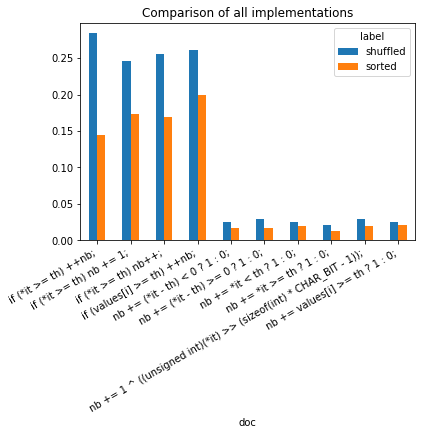

In [10]:
ax = dfg.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of all implementations");

It seems that inline tests (``cond ? value1 : value2``) do not stop the branching and it should be used whenever possible.

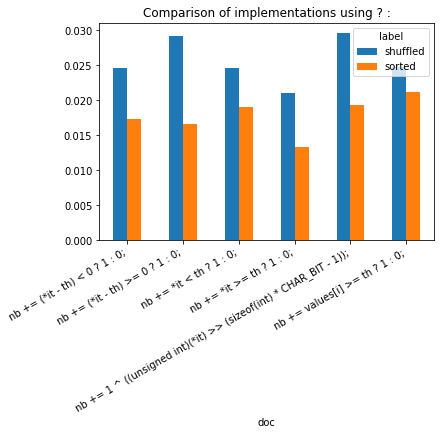

In [11]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('[?^]')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of implementations using ? :");

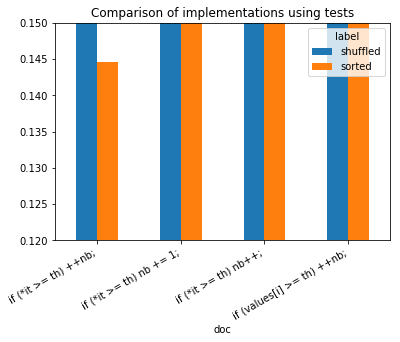

In [12]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('if')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_ylim([0.12, 0.15])
ax.set_title("Comparison of implementations using tests");

*sorted*, *not sorted* does not seem to have a real impact in this case. It shows *branching* really slows down the execution of a program. Branching happens whenever the program meets a loop condition or a test. Iterator ``*it`` are faster than accessing an array with notation ``[i]`` which adds a cost due to an extra addition.

## Second experiment: dot product

The goal is to compare the dot product from [numpy.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) and a couple of implementation in C++.

In [13]:
%matplotlib inline

In [14]:
import numpy

def simple_dot(values):
    return numpy.dot(values, values)

values = list(range(10000000))
values = numpy.array(values, dtype=numpy.float32)
vect = values / numpy.max(values)
simple_dot(vect)

3333333.2

In [15]:
vect.dtype

dtype('float32')

In [16]:
from timeit import Timer

def measure_time(stmt, context, repeat=10, number=50):
    tim = Timer(stmt, globals=context)
    res = numpy.array(tim.repeat(repeat=repeat, number=number))
    mean = numpy.mean(res)
    dev = numpy.mean(res ** 2)
    dev = (dev - mean**2) ** 0.5
    return dict(average=mean, deviation=dev, min_exec=numpy.min(res),
                max_exec=numpy.max(res), repeat=repeat, number=number,
                size=context['values'].shape[0])

measure_time("simple_dot(values)", context=dict(simple_dot=simple_dot, values=vect))

{'average': 0.10138990750000047,
 'deviation': 0.008654755653649404,
 'min_exec': 0.09204155399999792,
 'max_exec': 0.11354399100000023,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [17]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("simple_dot(values)", repeat=100,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
dot = pandas.DataFrame(res)
dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.001282,0.000359,0.002106,0.000695,50,100,187510
76,0.001228,0.000354,0.002132,0.000689,50,100,190010
77,0.001309,0.000301,0.002137,0.000725,50,100,192510
78,0.001303,0.000329,0.002176,0.000705,50,100,195010
79,0.001292,0.000268,0.001563,0.000732,50,100,197510


In [18]:
res = []
for i in range(100000, 10000000, 1000000):
    t = measure_time("simple_dot(values)", repeat=10,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)
    
huge_dot = pandas.DataFrame(res)
huge_dot.head()

,average,deviation,max_exec,min_exec,number,repeat,size
0,0.001599,0.000811,0.003718,0.000787,50,10,100000
1,0.009523,0.001686,0.012843,0.006636,50,10,1100000
2,0.021579,0.002297,0.024504,0.018018,50,10,2100000
3,0.029569,0.002440,0.033978,0.025643,50,10,3100000
4,0.037091,0.001086,0.039047,0.035381,50,10,4100000


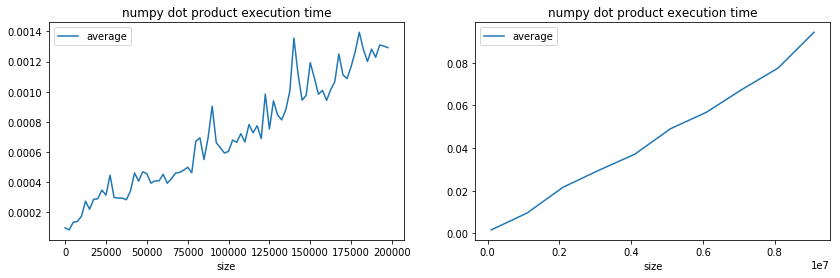

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0])
huge_dot.plot(x='size', y="average", ax=ax[1])
ax[0].set_title("numpy dot product execution time");
ax[1].set_title("numpy dot product execution time");

Now the custom implementation. We start with an empty function to get a sense of the cost due to to pybind11.

In [20]:
from cpyquickhelper.numbers.cbenchmark import empty_vector_dot_product
empty_vector_dot_product(vect, vect)

0.0

In [21]:
def empty_c11_dot(vect):
    return empty_vector_dot_product(vect, vect)

measure_time("empty_c11_dot(values)", context=dict(empty_c11_dot=empty_c11_dot, values=vect), repeat=10)

{'average': 7.861729999945056e-05,
 'deviation': 5.752138455230638e-06,
 'min_exec': 7.506200000051422e-05,
 'max_exec': 9.086400000057893e-05,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

Very small. It should not pollute our experiments.

In [22]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product
vector_dot_product(vect, vect)

3334629.0

In [23]:
def c11_dot(vect):
    return vector_dot_product(vect, vect)

measure_time("c11_dot(values)", context=dict(c11_dot=c11_dot, values=vect), repeat=10)

{'average': 1.230638641500002,
 'deviation': 0.06253004633593653,
 'min_exec': 1.150500859999994,
 'max_exec': 1.354440181000001,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [24]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot(values)", repeat=10,
                     context=dict(c11_dot=c11_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
cus_dot = pandas.DataFrame(res)
cus_dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.021315,0.000960,0.022708,0.019550,50,10,187510
76,0.021803,0.001620,0.023953,0.018914,50,10,190010
77,0.021976,0.002127,0.024301,0.016995,50,10,192510
78,0.023837,0.003302,0.031787,0.019257,50,10,195010
79,0.023727,0.002631,0.029847,0.020970,50,10,197510


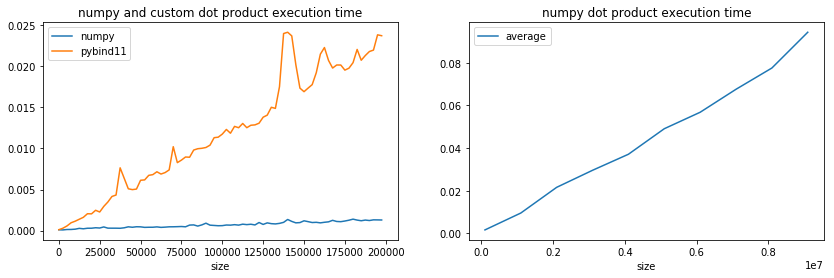

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
huge_dot.plot(x='size', y="average", ax=ax[1])
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy dot product execution time");

Pretty slow. Let's see what it does to compute dot product 16 by 16.

In [26]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16
vector_dot_product16(vect, vect)

3333347.75

In [27]:
def c11_dot16(vect):
    return vector_dot_product16(vect, vect)

measure_time("c11_dot16(values)", context=dict(c11_dot16=c11_dot16, values=vect), repeat=10)

{'average': 0.549444384600001,
 'deviation': 0.03770776910745487,
 'min_exec': 0.49643061400000477,
 'max_exec': 0.609181716000009,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [28]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16(values)", repeat=10,
                     context=dict(c11_dot16=c11_dot16, values=vect[:i].copy()))
    res.append(t)

cus_dot16 = pandas.DataFrame(res)
cus_dot16.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.008781,0.000703,0.009825,0.007852,50,10,187510
76,0.008244,0.000796,0.009833,0.007157,50,10,190010
77,0.013141,0.004889,0.020504,0.007861,50,10,192510
78,0.021605,0.001113,0.022815,0.019202,50,10,195010
79,0.012634,0.003342,0.019947,0.009158,50,10,197510


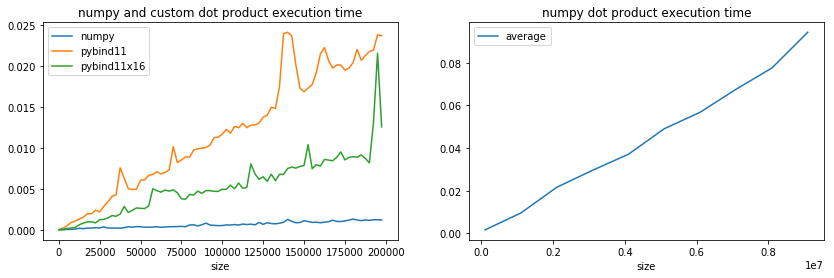

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
huge_dot.plot(x='size', y="average", ax=ax[1])
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy dot product execution time");

We are far from *numpy* but the branching has clearly a huge impact and the fact the loop condition is evaluated only every 16 iterations does not explain this gain. Next experiment with AVX instructions.

In [30]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_avx
vector_dot_product16_avx(vect, vect)

3333348.0

In [31]:
def c11_dot16_avx(vect):
    return vector_dot_product16_avx(vect, vect)

measure_time("c11_dot16_avx(values)", context=dict(c11_dot16_avx=c11_dot16_avx, values=vect), repeat=10)

{'average': 0.22894923780000057,
 'deviation': 0.017864189231819375,
 'min_exec': 0.1984167499999927,
 'max_exec': 0.25440178099999855,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [32]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_avx(values)", repeat=10,
                     context=dict(c11_dot16_avx=c11_dot16_avx, values=vect[:i].copy()))
    res.append(t)

cus_dot16_avx = pandas.DataFrame(res)
cus_dot16_avx.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.002974,0.000407,0.003799,0.002448,50,10,187510
76,0.003231,0.000525,0.003864,0.002324,50,10,190010
77,0.003069,0.000333,0.003878,0.002718,50,10,192510
78,0.002710,0.000390,0.003774,0.002353,50,10,195010
79,0.003206,0.000572,0.003990,0.002421,50,10,197510


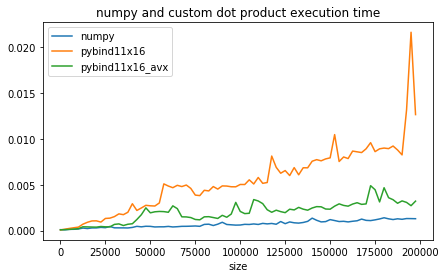

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
dot.plot(x='size', y="average", ax=ax, label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax, label="pybind11x16")
cus_dot16_avx.plot(x='size', y="average", ax=ax, label="pybind11x16_avx")
ax.set_title("numpy and custom dot product execution time");

Better even though it is still 4 times slower than *numpy*.

Last experiment with AVX 512 instructions but it does not work on all processor.

In [34]:
import platform
platform.processor()

'Intel64 Family 6 Model 78 Stepping 3, GenuineIntel'

In [35]:
import numpy
values = numpy.array(list(range(10000000)), dtype=numpy.float32)
vect = values / numpy.max(values)

In [36]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_avx512
vector_dot_product16_avx512(vect, vect)

In [37]:
def c11_dot16_avx512(vect):
    return vector_dot_product16_avx512(vect, vect)

measure_time("c11_dot16_avx512(values)",
             context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect), repeat=10)

In [38]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_avx512(values)", repeat=10,
                     context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect[:i].copy()))
    res.append(t)

cus_dot16_avx512 = pandas.DataFrame(res)
cus_dot16_avx512.tail()

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
dot.plot(x='size', y="average", ax=ax, label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax, label="pybind11x16")
cus_dot16_avx.plot(x='size', y="average", ax=ax, label="pybind11x16_avx")
cus_dot16_avx512.plot(x='size', y="average", ax=ax, label="pybind11x16_avx512")
ax.set_title("numpy and custom dot product execution time");